In [52]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
#from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
import pandas as pd
import plotnine
%matplotlib inline

from  mizani import formatters # for better axis labelling
from matplotlib.patches import Rectangle


In [722]:
#pip install plotnine

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [3]:
# empathy87 on github

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')
        

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

#### Read in and process the data

In [5]:
#df['Response'] = df['Response'].apply (lambda x: str(x).replace  ('%', '') ).astype(int)/ 100

df = pd.read_csv ( 'Data\FIG0602.csv')
df['sales_mod'] = df['sales'].apply (lambda x: str(x).replace  ('$', '') ).astype(int)
df.head()

,category,year,sales,increase,avg,sales_mod
0,ACTUAL,2006,$52,NaN,NaN,52
1,ACTUAL,2007,$54,4%,7.2%,54
2,ACTUAL,2008,$60,11%,NaN,60
3,ACTUAL,2009,$64,7%,NaN,64
4,ACTUAL,2010,$78,22%,NaN,78


In [6]:
def SWD_style ():

    # Basic information from the 
    
    font = "Arial"
    t=theme_minimal(base_size = 10, base_family = font ) 

    t2 = theme(
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),

      axis_line = element_line(size = .1, color = GRAY9),
      axis_text = element_text(color = GRAY3, size = 12),

      #axis.ticks.x = element_line(size = 0.5, color = GRAY9),
      #axis.ticks.y = element_line(size = 0.5, color = GRAY9),
        
      axis_title = element_text(color = GRAY3),

      #axis_title_y = element_text(hjust = 1, margin = margin(0, 6, 0, 15, "pt")),
      #axis_title_x = element_text(hjust = 0, margin = margin(6, 0, 15, 0, "pt")),
      #plot_subtitle = element_text(color = GRAY4, size= 8),

      plot_title = element_text(color = GRAY4, size= 12 ),
        
      # I don't think this line is implemented in plotnine
      #plot_title_position = "plot", # This aligns the plot title to the very left edge
        
      #plot_caption = element_text(hjust = 0, color = GRAY6),
      #plot_caption_position = "plot",

      #plot_margin = margin(.5,.5,.5,.5,"cm"),
      #plot_margin = (0.4 ),  
        
      strip_text = element_text(color = GRAY7)) 
    
    return t+ t2


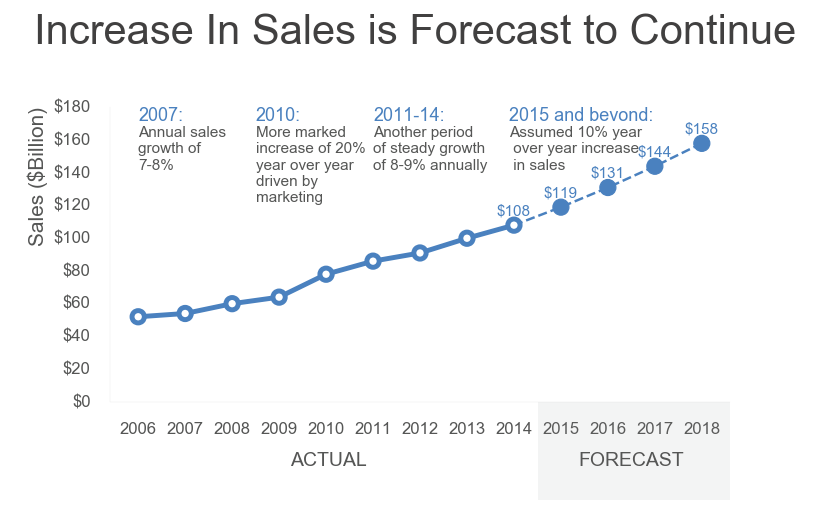

In [124]:
t = theme(         
    
          # Overrides
          axis_title_y = element_text(angle = 90, va = 'bottom', ha = 'left', size = 15, color = GRAY3, y = 0.52),
          panel_grid_major_y=element_blank(), 
          subplots_adjust={'top': 0.80, 'bottom': 0.2}
    
)

boolIndex_FC_1 = (df.category == "FORECAST") | ((df.category == "ACTUAL") & (df.year == 2014))
boolIndex_FC_2 = (df.category == "FORECAST") 
boolIndex_ACT_1 = (df.category == "ACTUAL") 

fig = ( ggplot(  df, aes(x = "year", y = "sales_mod" )  )  +\

       geom_label(label= '2007:' , x=2006, y=181  , color=BLUE2,fill="white",  boxcolor='none', size=13, ha='left',va="top") +\
       geom_label( x=2006, y=169, label='Annual sales\ngrowth of\n7-8%', color=GRAY3, fill="white",  boxcolor='none', size=11, ha='left',va="top") +\

       geom_label(label= '2010:' , x=2008.5, y=181 , color=BLUE2,fill="white",  boxcolor='none', size=13, ha='left',va="top") +\
       geom_label( x=2008.5, y=169, label='More marked\nincrease of 20%\nyear over year\ndriven by\nmarketing', color=GRAY3, fill="white",  boxcolor='none', size=11, ha='left',va="top") +\

       geom_label(label= '2011-14:' , x=2011, y=181  , color=BLUE2,fill="white",  boxcolor='none', size=13, ha='left', va='top') +\
       geom_label( x=2011, y=169, label='Another period\nof steady growth\nof 8-9% annually', color=GRAY3, fill="white",  boxcolor='none', size=11, ha='left',va="top") +\
       
       geom_label(label= '2015 and beyond:', x=2013.9, y=181  , color=BLUE2,fill="white",  boxcolor='none', size=13, ha='left',va="top") +\
       geom_label( x=2013.9, y=169, label='Assumed 10% year\n over year increase\n in sales', color=GRAY3, fill="white",  boxcolor='none', size=11, ha='left', va="top") +\
       
       
       geom_line (data = df [ boolIndex_FC_1] , size = 1, color = BLUE2, linetype = 'dashed' ) +\
       geom_point(data = df [boolIndex_FC_2], size = 6, color = BLUE2, shape = 'o') +\
       geom_line(data = df[boolIndex_ACT_1], color = BLUE2, size = 2) +\
       geom_point(data = df[boolIndex_ACT_1], size = 3, fill = "white", color = BLUE2, stroke = 2, shape = 'o') +\
       geom_text(aes (label='sales_mod') , format_string="${:.0f}" , nudge_y = 9 , color=BLUE2, data = df[boolIndex_FC_1] ) +\
       SWD_style() + t +\
       labs(y = "Sales ($Billion)"  , x = "",
       caption = "Data source: Sales Dashboard; annual figures are as of 12/31 of hte given year.\n*Use this footnote to explain what is driving the 10% annual growth forecast assumption")  +\

       scale_x_continuous(breaks = range (2006,2018+1,1) ) +\
       scale_y_continuous(breaks = range (0,180+1,20), labels = formatters.dollar_format(digits=0), limits = [0,180], expand = [0,0] ) 
       

       
).draw(show=False, return_ggplot=False) 

# Having got the plot make some other annotations.
ax1 = fig.axes[0]

# Rectangle for forecast
#ax1.add_patch(Rectangle((2015, 5), 10, -20, facecolor=GRAY7))

ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.

#ax0.add_patch(Rectangle((0.66, 0.1), 0.33, -2  , facecolor=GRAY7,alpha=0.1)  )
ax0.add_patch(Rectangle((0.66, 0.2), 0.24, -3, facecolor=GRAY7,alpha=0.1)  )


ax0.text(0.35 , 0.1,
         'ACTUAL',
         fontsize=14,
         color=GRAY3, va="top")

ax0.text(0.71 ,0.1,
         'FORECAST',
         fontsize=14,
         color=GRAY3, va="top")

# Shift up y label - now done in ggplot :)
#ax1.yaxis.set_label_coords(-0.03, 0.93)

title_text = 'Increase In Sales is Forecast to Continue'
ax0.text( 0.03, 0.93,
         title_text, 
         fontsize=30,
         color=GRAY2)#,
         # put a rectangular box around the text to set a background color
         #bbox={'facecolor': GRAY7, 'pad': 5, 'edgecolor': "None"} ) 

fig.dpi = 100
width_in = 8
fig.set_size_inches(width_in , width_in / 1.63) 

fig.savefig ( 'Plots/6_sales_with_forecast')